In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Временные ряды
## Пакет Datetime

In [1]:
from datetime import datetime

In [2]:

from datetime import datetime
now = datetime.now()
print('сейчас ',now)
display(now)

print('сейчас год ',now.year) 
print('сейчас месяц ',now.month)
print('сейчас день ',now.day)


сейчас  2022-04-21 14:09:49.587804


datetime.datetime(2022, 4, 21, 14, 9, 49, 587804)

сейчас год  2022
сейчас месяц  4
сейчас день  21


In [4]:
from datetime import timedelta


from datetime import timedelta
start = datetime(2020, 1, 1)
start + timedelta(12)

datetime.datetime(2020, 1, 13, 0, 0)

In [5]:
start - 2 * timedelta(12)

datetime.datetime(2019, 12, 8, 0, 0)

In [6]:
# разнича считается в днях и секундах!
start + timedelta(12,24000,1)

datetime.datetime(2020, 1, 13, 6, 40, 0, 1)

## Конвертирование даты/времени строка<-->время

In [7]:
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [8]:
stamp.strftime('%y-%m-%d')

'11-01-03'

In [9]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [10]:
value = '01.03.20 23:39'
datetime.strptime(value, '%d.%m.%y %H:%M')

datetime.datetime(2020, 3, 1, 23, 39)

In [11]:
datestrs = ['10/1/2020', '12/2/2020']

# американская традиция записи
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2020, 10, 1, 0, 0), datetime.datetime(2020, 12, 2, 0, 0)]

In [12]:
# российская и европейская традиция записи
[datetime.strptime(x, '%d/%m/%Y') for x in datestrs]

[datetime.datetime(2020, 1, 10, 0, 0), datetime.datetime(2020, 2, 12, 0, 0)]

|Спецификатор|Описание|
|:------|:---------------------------------------|
| %Y   | Год с четырьмя цифрами                |
| %y   | Год с двумя цифрами                   |
| %m   | Номер месяца с двумя цифрами [01, 12] |
|  %d  | Номер дня с двумя цифрами [01, 31]    |
| %H   | Час (в 24-часовом формате) [00, 23]   |
| %I   | Час (в 12-часовом формате) [01, 12]   |
| %M   | Минута с двумя цифрами [01, 59]       |
| %S   | Секунда [00, 61] (секунды 60 и 61 високосные)                                      |
| %w  | День недели в виде целого числа [0 (воскресенье), 6]                               |
| %U  | Номер недели в году [00, 53]. Первым днем недели считается воскресенье, а дни, предшествующие первому воскресенью, относятся к неделе 0  |
| %W  | Номер недели в году [00, 53]. Первым днем недели считается понедельник, а дни, предшествующие первому понедельнику, относятся к неделе 0 |
| %z  | Часовой пояс UTC в виде +HHMM или –HHMM; пустая строка, если часовой пояс не учитывается                                                 |
| %F  | Сокращение для %Y–%m–%d, например 2012–4–18 %D Сокращение для %m/%d/%y, например 04/18/12                                                |

## Стандартный парсер

In [13]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [15]:
# не правильный парсер для России
parse('6/12/2011')

datetime.datetime(2011, 6, 12, 0, 0)

In [16]:
# правильный парсер для России
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

## Pandas парсер

In [17]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [18]:
idx = pd.to_datetime(datestrs + [None]) # или np.nan (к вопросу о отображении пропущенного времени)
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [19]:
idx[2]

NaT

In [20]:
# проверим поиск пропущенных данных
pd.isna(idx)

array([False, False,  True])

## Введение во временные индексы

In [21]:
from datetime import datetime
dates = [datetime(2020, 1, 2), datetime(2020, 1, 5),
         datetime(2020, 1, 7), datetime(2020, 1, 8),
         datetime(2020, 1, 10), datetime(2020, 1, 12)]

np.random.seed(42)
ts = pd.Series(np.random.randn(6), index=dates)
ts

2020-01-02    0.496714
2020-01-05   -0.138264
2020-01-07    0.647689
2020-01-08    1.523030
2020-01-10   -0.234153
2020-01-12   -0.234137
dtype: float64

In [22]:
ts.index

DatetimeIndex(['2020-01-02', '2020-01-05', '2020-01-07', '2020-01-08',
               '2020-01-10', '2020-01-12'],
              dtype='datetime64[ns]', freq=None)

In [23]:
ts[::2]+ts

2020-01-02    0.993428
2020-01-05         NaN
2020-01-07    1.295377
2020-01-08         NaN
2020-01-10   -0.468307
2020-01-12         NaN
dtype: float64

In [24]:
ts.index.dtype

dtype('<M8[ns]')

In [25]:
stamp = ts.index[0]
stamp

Timestamp('2020-01-02 00:00:00')

### Индексирование, выбор, подмножество

In [26]:
stamp = ts.index[2]
display(stamp)
ts[stamp]

Timestamp('2020-01-07 00:00:00')

0.6476885381006925

In [27]:
ts['1/10/2020']

-0.23415337472333597

In [28]:
ts['20200110']  # почему я так записал

-0.23415337472333597

In [29]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    1.579213
2000-01-02    0.767435
2000-01-03   -0.469474
2000-01-04    0.542560
2000-01-05   -0.463418
                ...   
2002-09-22    0.924634
2002-09-23    0.059630
2002-09-24   -0.646937
2002-09-25    0.698223
2002-09-26    0.393485
Freq: D, Length: 1000, dtype: float64

In [30]:
longer_ts['2001']

2001-01-01    1.451144
2001-01-02    0.959271
2001-01-03    2.153182
2001-01-04   -0.767348
2001-01-05    0.872321
                ...   
2001-12-27    0.408253
2001-12-28   -1.702584
2001-12-29    1.029156
2001-12-30    0.472597
2001-12-31    0.256030
Freq: D, Length: 365, dtype: float64

In [31]:
longer_ts['2001-05']

2001-05-01    0.077368
2001-05-02   -0.861284
2001-05-03    1.523124
2001-05-04    0.538910
2001-05-05   -1.037246
2001-05-06   -0.190339
2001-05-07   -0.875618
2001-05-08   -1.382800
2001-05-09    0.926178
2001-05-10    1.909417
2001-05-11   -1.398568
2001-05-12    0.562969
2001-05-13   -0.650643
2001-05-14   -0.487125
2001-05-15   -0.592394
2001-05-16   -0.863991
2001-05-17    0.048522
2001-05-18   -0.830950
2001-05-19    0.270457
2001-05-20   -0.050238
2001-05-21   -0.238948
2001-05-22   -0.907564
2001-05-23   -0.576771
2001-05-24    0.755391
2001-05-25    0.500917
2001-05-26   -0.977555
2001-05-27    0.099332
2001-05-28    0.751387
2001-05-29   -1.669405
2001-05-30    0.543360
2001-05-31   -0.662624
Freq: D, dtype: float64

In [32]:
display(ts)
ts[datetime(2020, 1, 7):]

2020-01-02    0.496714
2020-01-05   -0.138264
2020-01-07    0.647689
2020-01-08    1.523030
2020-01-10   -0.234153
2020-01-12   -0.234137
dtype: float64

2020-01-07    0.647689
2020-01-08    1.523030
2020-01-10   -0.234153
2020-01-12   -0.234137
dtype: float64

In [33]:

ts
ts['1/6/2020':'1/11/2020']

2020-01-07    0.647689
2020-01-08    1.523030
2020-01-10   -0.234153
dtype: float64

In [34]:
ts.truncate(after='1/9/2020')

2020-01-02    0.496714
2020-01-05   -0.138264
2020-01-07    0.647689
2020-01-08    1.523030
dtype: float64

In [35]:
ts.truncate(after='2020-01-09') # возможен вариант before

2020-01-02    0.496714
2020-01-05   -0.138264
2020-01-07    0.647689
2020-01-08    1.523030
dtype: float64

In [36]:
dates = pd.date_range('2000-01-01', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['2001-05']

,Colorado,Texas,New York,Ohio
2001-05-02,0.708109,0.956702,-0.785989,-1.331233
2001-05-09,-1.836205,0.507991,-1.103367,-2.152891
2001-05-16,0.388579,2.493000,-0.006071,0.838491
2001-05-23,0.081829,-0.098890,0.919076,-0.290275
2001-05-30,0.267392,0.321698,-0.668090,0.992042


### Временной ряд с дубликатами индексов

In [37]:
dates = pd.DatetimeIndex(['1/1/2000', 
                          '1/2/2000', 
                          '1/2/2000',
                          '1/2/2000', 
                          '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [38]:
dup_ts.index.is_unique

False

In [39]:
# индекс без дубликата
dup_ts['1/3/2000']

4

In [40]:
# индекс с дубликатом
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [41]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [42]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Диапазоны дат, частоты и сдвиги

### Гененрируем даты

In [43]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [44]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [45]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

Неполный список частот временных рядов (только основные)

| Обозначение             | Тип смещения        | Описание                                                                                                                                                                             |
|:-------------------------|:---------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| D                       | Day                 | Ежедневно                                                                                                                                                                            |
| B                       | BusinessDay         | Каждый рабочий день                                                                                                                                                                  |
| H                       | Hour                | Ежечасно                                                                                                                                                                             |
| T или min               | Minute              | Ежеминутно                                                                                                                                                                           |
| S                       | Second              | Ежесекундно                                                                                                                                                                          |
| L или ms                | Milli               | Каждую миллисекунду                                                                                                                                                                  |
| U                       | Micro               | Каждую микросекунду                                                                                                                                                                  |
| M                       | MonthEnd            | Последний календарный день месяца                                                                                                                                                    |
| BM                      | BusinessMonthEnd    | Последний рабочий день месяца                                                                                                                                                        |
| MS                      | MonthBegin          | Первый календарный день месяца                                                                                                                                                       |
| BMS                     | BusinessMonthBegin  | Первый рабочий день месяца                                                                                                                                                           |
| W–MON, W–TUE, ...       | Week                | Еженедельно в указанный день: MON, TUE, WED, THU, FRI, SAT, SUN                                                                                                                      |
| WOM–1MON, WOM–2MON, ... | WeekOfMonth         | Указанный день первой, второй, третьей или четвертой недели месяца. Например, WOM–3FRI означает третью пятницу каждого месяца                                                        |
| Q–JAN, Q–FEB, ...       | QuarterEnd          | Ежеквартально с привязкой к последнему календарному дню каждого месяца, считая, что год заканчивается в указанном месяце: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC |
| BQ–JAN, BQ–FEB, . . .  | BusinessQuarterEnd    | Ежеквартально с привязкой к последнему рабочему дню каждого месяца, считая, что год заканчивается в указанном месяце              |
| QS–JAN, QS–FEB, . . .  | QuarterBegin          | Ежеквартально с привязкой к первому календарному дню каждого месяца, считая, что год заканчивается в указанном месяце             |
| BQS–JAN, BQS–FEB, ...  | BusinessQuarterBegin  | Ежеквартально с привязкой к первому рабочему дню каждого месяца, считая, что год заканчивается в указанном месяце                 |
| A–JAN, A–FEB, ...      | YearEnd               | Ежегодно с привязкой к последнему календарному дню указанного месяца: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC  |
| BA–JAN, BA–FEB, . . .  | BusinessYearEnd       | Ежегодно с привязкой к последнему рабочему дню указанного месяца                                                                  |
| AS–JAN, AS–FEB, . . .  | YearBegin             | Ежегодно с привязкой к первому календарному дню указанного месяца                                                                 |
| BAS–JAN, BAS–FEB, ...  | BusinessYearBegin     | Ежегодно с привязкой к первому рабочему дню указанного месяца                                                                     |

In [46]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [47]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Частоты и смещение дат

In [49]:
# смещением даты (date offset)
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [50]:
# смещение даты на 4 часа
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [51]:
# смещение даты на 1 час 30 мин
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Даты, связанные с неделей месяца

In [52]:
# WOM понедельно месяц
# WOM-3FRI каждая третья пятница в месяце
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI') 
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Сдвиг всех данных сразу

In [53]:
per=10
ts = pd.Series(range(per), index=pd.date_range('1/1/2000', periods=per, freq='W'))+1
ts

2000-01-02     1
2000-01-09     2
2000-01-16     3
2000-01-23     4
2000-01-30     5
2000-02-06     6
2000-02-13     7
2000-02-20     8
2000-02-27     9
2000-03-05    10
Freq: W-SUN, dtype: int64

In [54]:
ts.shift(2)

2000-01-02    NaN
2000-01-09    NaN
2000-01-16    1.0
2000-01-23    2.0
2000-01-30    3.0
2000-02-06    4.0
2000-02-13    5.0
2000-02-20    6.0
2000-02-27    7.0
2000-03-05    8.0
Freq: W-SUN, dtype: float64

In [55]:
ts.shift(-2)

2000-01-02     3.0
2000-01-09     4.0
2000-01-16     5.0
2000-01-23     6.0
2000-01-30     7.0
2000-02-06     8.0
2000-02-13     9.0
2000-02-20    10.0
2000-02-27     NaN
2000-03-05     NaN
Freq: W-SUN, dtype: float64

In [56]:
# процентный прирост
ts / ts.shift(1)-1  

2000-01-02         NaN
2000-01-09    1.000000
2000-01-16    0.500000
2000-01-23    0.333333
2000-01-30    0.250000
2000-02-06    0.200000
2000-02-13    0.166667
2000-02-20    0.142857
2000-02-27    0.125000
2000-03-05    0.111111
Freq: W-SUN, dtype: float64

In [57]:
# процентный приростот нуля
(ts / ts.shift(1)-1).fillna(0)  

2000-01-02    0.000000
2000-01-09    1.000000
2000-01-16    0.500000
2000-01-23    0.333333
2000-01-30    0.250000
2000-02-06    0.200000
2000-02-13    0.166667
2000-02-20    0.142857
2000-02-27    0.125000
2000-03-05    0.111111
Freq: W-SUN, dtype: float64

In [58]:
# данные на месте сдвигаем время
display (ts)
ts.shift(2, freq='D')

2000-01-02     1
2000-01-09     2
2000-01-16     3
2000-01-23     4
2000-01-30     5
2000-02-06     6
2000-02-13     7
2000-02-20     8
2000-02-27     9
2000-03-05    10
Freq: W-SUN, dtype: int64

2000-01-04     1
2000-01-11     2
2000-01-18     3
2000-01-25     4
2000-02-01     5
2000-02-08     6
2000-02-15     7
2000-02-22     8
2000-02-29     9
2000-03-07    10
dtype: int64

In [59]:
display (ts)
ts.shift(2, freq='M')

2000-01-02     1
2000-01-09     2
2000-01-16     3
2000-01-23     4
2000-01-30     5
2000-02-06     6
2000-02-13     7
2000-02-20     8
2000-02-27     9
2000-03-05    10
Freq: W-SUN, dtype: int64

2000-02-29     1
2000-02-29     2
2000-02-29     3
2000-02-29     4
2000-02-29     5
2000-03-31     6
2000-03-31     7
2000-03-31     8
2000-03-31     9
2000-04-30    10
dtype: int64

In [60]:
ts.shift(-1, freq='D')

2000-01-01     1
2000-01-08     2
2000-01-15     3
2000-01-22     4
2000-01-29     5
2000-02-05     6
2000-02-12     7
2000-02-19     8
2000-02-26     9
2000-03-04    10
dtype: int64

In [61]:
ts.shift(1, freq='90T')

2000-01-02 01:30:00     1
2000-01-09 01:30:00     2
2000-01-16 01:30:00     3
2000-01-23 01:30:00     4
2000-01-30 01:30:00     5
2000-02-06 01:30:00     6
2000-02-13 01:30:00     7
2000-02-20 01:30:00     8
2000-02-27 01:30:00     9
2000-03-05 01:30:00    10
dtype: int64

In [62]:
### Применение даты времени с группировкой - resample

In [63]:
np.random.seed(42)
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.496714
2000-01-19   -0.138264
2000-01-23    0.647689
2000-01-27    1.523030
2000-01-31   -0.234153
2000-02-04   -0.234137
2000-02-08    1.579213
2000-02-12    0.767435
2000-02-16   -0.469474
2000-02-20    0.542560
2000-02-24   -0.463418
2000-02-28   -0.465730
2000-03-03    0.241962
2000-03-07   -1.913280
2000-03-11   -1.724918
2000-03-15   -0.562288
2000-03-19   -1.012831
2000-03-23    0.314247
2000-03-27   -0.908024
2000-03-31   -1.412304
Freq: 4D, dtype: float64

In [64]:
ts.resample('M').mean()

2000-01-31    0.459003
2000-02-29    0.179493
2000-03-31   -0.872179
Freq: M, dtype: float64

### Локализация и преобразование часовых поясов 
Можно посмотреть самостоятельно (Маккини Python и анализ данных) стр. 355-359  
Это бывает важно, например при совмещении ряда американского и российского рынка.

## Временные периоды

In [65]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
display(rng)
ts = pd.Series(np.random.randn(3), index=rng)
ts

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

2000-01-31    1.465649
2000-02-29   -0.225776
2000-03-31    0.067528
Freq: M, dtype: float64

In [66]:
p = pd.Period('2020', freq='A-DEC')
p

Period('2020', 'A-DEC')

In [67]:
p.asfreq('D', 'start')

Period('2020-01-01', 'D')

In [68]:
p.asfreq('D', 'end')

Period('2020-12-31', 'D')

In [69]:
rng = pd.period_range('2006','2009', freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]')

In [70]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -1.424748
2007   -0.544383
2008    0.110923
2009   -1.150994
Freq: A-DEC, dtype: float64

In [71]:
# на первый день месяца
ts.asfreq('M', how='start')

2006-01   -1.424748
2007-01   -0.544383
2008-01    0.110923
2009-01   -1.150994
Freq: M, dtype: float64

In [72]:
ts

2006   -1.424748
2007   -0.544383
2008    0.110923
2009   -1.150994
Freq: A-DEC, dtype: float64

In [73]:
# на последний бизнес день месяца
ts.asfreq('B', how='start')

2006-01-02   -1.424748
2007-01-01   -0.544383
2008-01-01    0.110923
2009-01-01   -1.150994
Freq: B, dtype: float64

### Квартальная частота периода

Квартальные данные стандартно применяются в бухгалтерии, финансах и других областях. Обычно квартальные итоги подводятся относительно конца финансового года, каковым считается последний календарный или рабочий день одного из 12 месяцев. 

Следовательно, период 2012Q4 интерпретируется по-разному в зависимости от того, что понимать под концом финансового года. 

Библиотека pandas поддерживает все 12 возможных значений кварталь- ной частоты – от Q–JAN до Q–DEC:


[<img src="Quart.pdf" width="750"/>](Quart.pdf)

In [5]:
data = pd.read_csv('macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [6]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [7]:
data.index = index
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Передискретизация

In [8]:
np.random.seed(42)
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.496714
2000-01-02   -0.138264
2000-01-03    0.647689
2000-01-04    1.523030
2000-01-05   -0.234153
                ...   
2000-04-05   -1.463515
2000-04-06    0.296120
2000-04-07    0.261055
2000-04-08    0.005113
2000-04-09   -0.234587
Freq: D, Length: 100, dtype: float64

In [9]:
# привязка к последней дате
ts.resample('M').mean()

2000-01-31   -0.201488
2000-02-29   -0.104592
2000-03-31    0.015601
2000-04-30   -0.176555
Freq: M, dtype: float64

In [10]:
# привязка к периоду
ts.resample('M', kind='period').mean()

2000-01   -0.201488
2000-02   -0.104592
2000-03    0.015601
2000-04   -0.176555
Freq: M, dtype: float64

Периоды часто нужны для корректной визуализации, что бы результат на графике отражался не на последнее число, а на квартал.

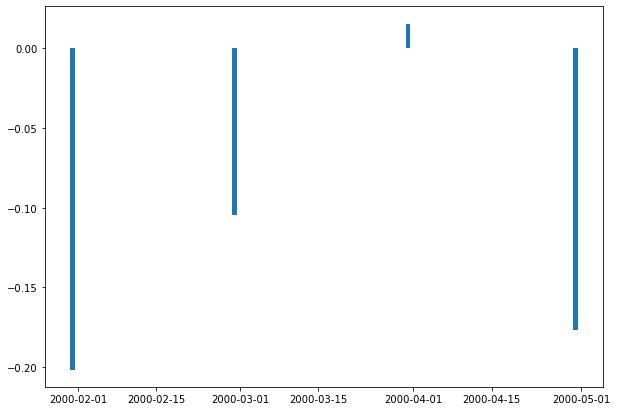

In [11]:
tss = ts.resample('M').mean()
plt.figure(figsize=(10,7))
plt.bar(tss.index, tss.values);

2000-01   -0.201488
2000-02   -0.104592
2000-03    0.015601
2000-04   -0.176555
Freq: M, dtype: float64

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

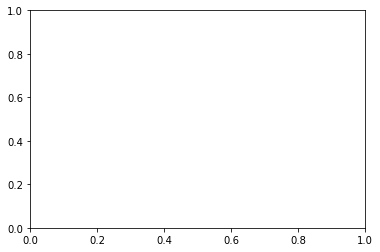

In [12]:
### Здесь ошибка, важно понять почему она возникает
tss = ts.resample('M',kind='period').mean()
display(tss)
plt.bar(tss.index, tss.values)

<BarContainer object of 4 artists>

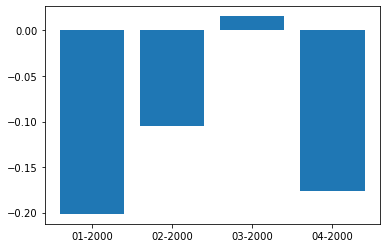

In [24]:
plt.bar(tss.index.strftime('%m-%Y'), tss.values) 

,index,0
0,2000-01,-0.201488
1,2000-02,-0.104592
2,2000-03,0.015601
3,2000-04,-0.176555


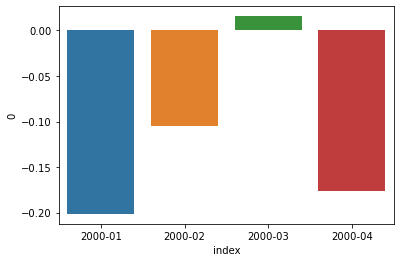

In [25]:
tss = ts.resample('M',kind='period').mean()
rs = tss.reset_index()
display(rs)
sns.barplot(x='index',  y=0 , data = rs)
plt.show()

### Регуляризация частоты

In [26]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [27]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [28]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [29]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [30]:
ts.resample('5min', closed='left', label='right').sum()

2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int64

In [31]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [32]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

Влючение окончания и меток интервалов

[<img src="resample.pdf" width="750"/>](resample.pdf)

#### Как на бирже (ohlc)

In [38]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Интерполяция

In [39]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('12/01/2020', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2020-12-02,-0.034712,-1.168678,1.142823,0.751933
2020-12-09,0.791032,-0.909387,1.402794,-1.401851


In [40]:
# заполним пропуски
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2020-12-02,-0.034712,-1.168678,1.142823,0.751933
2020-12-03,NaN,NaN,NaN,NaN
2020-12-04,NaN,NaN,NaN,NaN
2020-12-05,NaN,NaN,NaN,NaN
2020-12-06,NaN,NaN,NaN,NaN
2020-12-07,NaN,NaN,NaN,NaN
2020-12-08,NaN,NaN,NaN,NaN
2020-12-09,0.791032,-0.909387,1.402794,-1.401851


In [41]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2020-12-02,-0.034712,-1.168678,1.142823,0.751933
2020-12-03,-0.034712,-1.168678,1.142823,0.751933
2020-12-04,-0.034712,-1.168678,1.142823,0.751933
2020-12-05,-0.034712,-1.168678,1.142823,0.751933
2020-12-06,-0.034712,-1.168678,1.142823,0.751933
2020-12-07,-0.034712,-1.168678,1.142823,0.751933
2020-12-08,-0.034712,-1.168678,1.142823,0.751933
2020-12-09,0.791032,-0.909387,1.402794,-1.401851


In [42]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2020-12-02,-0.034712,-1.168678,1.142823,0.751933
2020-12-03,-0.034712,-1.168678,1.142823,0.751933
2020-12-04,-0.034712,-1.168678,1.142823,0.751933
2020-12-05,NaN,NaN,NaN,NaN
2020-12-06,NaN,NaN,NaN,NaN
2020-12-07,NaN,NaN,NaN,NaN
2020-12-08,NaN,NaN,NaN,NaN
2020-12-09,0.791032,-0.909387,1.402794,-1.401851


In [43]:
display(frame)
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2020-12-02,-0.034712,-1.168678,1.142823,0.751933
2020-12-09,0.791032,-0.909387,1.402794,-1.401851


,Colorado,Texas,New York,Ohio
2020-12-03,-0.034712,-1.168678,1.142823,0.751933
2020-12-10,0.791032,-0.909387,1.402794,-1.401851


,Colorado,Texas,New York,Ohio
2020-12-02,-0.034712,-1.168678,1.142823,0.751933
2020-12-03,NaN,NaN,NaN,NaN
2020-12-04,NaN,NaN,NaN,NaN
2020-12-05,NaN,NaN,NaN,NaN
2020-12-06,NaN,NaN,NaN,NaN
2020-12-07,NaN,NaN,NaN,NaN
2020-12-08,NaN,NaN,NaN,NaN
2020-12-09,0.791032,-0.909387,1.402794,-1.401851


,Colorado,Texas,New York,Ohio
2020-12-02,-0.034712,-1.168678,1.142823,0.751933
2020-12-03,0.083252,-1.131637,1.179962,0.444250
2020-12-04,0.201215,-1.094595,1.217100,0.136566
2020-12-05,0.319178,-1.057554,1.254239,-0.171117
2020-12-06,0.437142,-1.020512,1.291378,-0.478801
2020-12-07,0.555105,-0.983470,1.328517,-0.786484
2020-12-08,0.673069,-0.946429,1.365656,-1.094168
2020-12-09,0.791032,-0.909387,1.402794,-1.401851


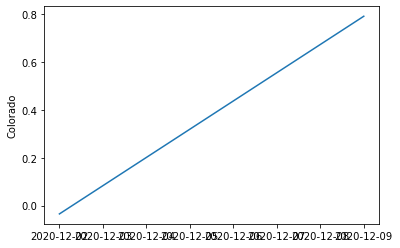

In [44]:
# настоящая интерполяция
display(df_daily)
inter = df_daily.interpolate(method='linear', axis=0)
display(inter)
sns.lineplot(data = inter.Colorado);

## Скользящие окна

In [55]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, 
                           index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [56]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


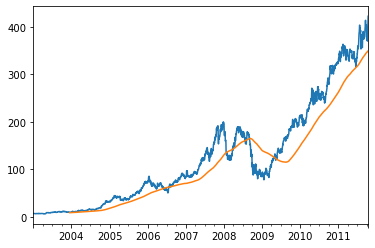

In [57]:
close_px.AAPL.plot();
close_px.AAPL.rolling(250).mean().plot();

In [58]:
close_px.AAPL.rolling(250).mean()[:10]

2003-01-02   NaN
2003-01-03   NaN
2003-01-06   NaN
2003-01-07   NaN
2003-01-08   NaN
2003-01-09   NaN
2003-01-10   NaN
2003-01-13   NaN
2003-01-14   NaN
2003-01-15   NaN
Freq: B, Name: AAPL, dtype: float64

In [59]:
close_px.AAPL.rolling(250, min_periods=0).mean()[:10]

2003-01-02    7.400000
2003-01-03    7.425000
2003-01-06    7.433333
2003-01-07    7.432500
2003-01-08    7.402000
2003-01-09    7.391667
2003-01-10    7.387143
2003-01-13    7.378750
2003-01-14    7.370000
2003-01-15    7.355000
Freq: B, Name: AAPL, dtype: float64

In [60]:
close_px.AAPL[:10]

2003-01-02    7.40
2003-01-03    7.45
2003-01-06    7.45
2003-01-07    7.43
2003-01-08    7.28
2003-01-09    7.34
2003-01-10    7.36
2003-01-13    7.32
2003-01-14    7.30
2003-01-15    7.22
Freq: B, Name: AAPL, dtype: float64

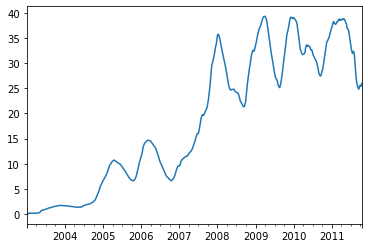

In [61]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=0).std()
appl_std250.plot();

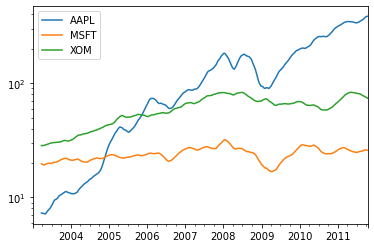

In [62]:
close_px.rolling(60).mean().plot(logy=True); # лог. масштаб

In [63]:
# 20 ДНЕВНОЕ скользящее среднее
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


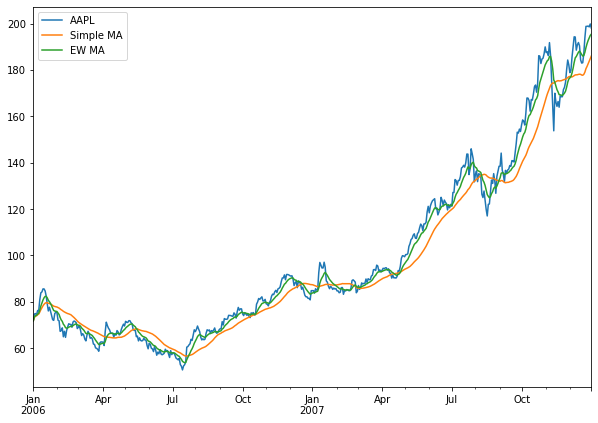

In [70]:
# Скользящие с затуханием

aapl_px = close_px.AAPL['2006':'2007']

ma60 = aapl_px.rolling(30, min_periods=0).mean()
ewma60 = aapl_px.ewm(span=10).mean() # придаем больший вес поздним значениям


plt.figure(figsize=(10,7))
aapl_px.plot( label='AAPL')
ma60.plot( label='Simple MA');
ewma60.plot( label='EW MA');
plt.legend();